In [1]:
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series,DataFrame

In [2]:
#視覺化
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [3]:
#顯示到小數點第三位
%precision 3
# 固定亂數種子
np.random.seed(0)

### 機率

In [4]:
#骰子
dice_data = np.array([1,2,3,4,5,6])

In [7]:
#隨機取出一個
print('隨機取出一個：',np.random.choice(dice_data,1))

隨機取出一個： [1]


In [9]:
# 丟1000次
calc_steps = 1000

# 進行1000次取出
dice_rolls = np.random.choice(dice_data, calc_steps)

# 各個數字出現的比例
for i in range(1, 7):
    p = len(dice_rolls[dice_rolls==i]) / calc_steps
    print(i, '出現的機率', p)

1 出現的機率 0.164
2 出現的機率 0.166
3 出現的機率 0.169
4 出現的機率 0.18
5 出現的機率 0.158
6 出現的機率 0.163


In [11]:
#4-1
coin_data = np.array([0,1])
coin_rolls = np.random.choice(coin_data,1000)
# 各個數字出現的比例
for i in range(0,2):
    p = len(coin_rolls[coin_rolls==i]) / 1000
    print(i, '出現的機率', p)

0 出現的機率 0.488
1 出現的機率 0.512


### 分布函數

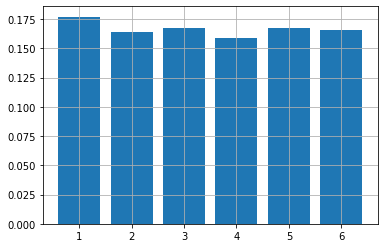

In [13]:
# 均勻分布
# 丟1000次
calc_steps = 1000

# 進行1000次取出
dice_rolls = np.random.choice(dice_data, calc_steps)

# 各個數字出現的比例
prob_data = np.array([])
for i in range(1, 7):
    p = len(dice_rolls[dice_rolls==i]) / calc_steps
    prob_data = np.append(prob_data, len(dice_rolls[dice_rolls==i]) / calc_steps)
    
plt.bar(dice_data, prob_data)
plt.grid(True)

In [16]:
# 伯努力分布
prob_be_data = np.array([])
coin_data = np.array([0, 0, 0, 0, 0, 1, 1, 1])

# 以unique取出唯一值
for i in np.unique(coin_data):
    p = len(coin_data[coin_data==i]) / len(coin_data)
    print(i, '出現的機率', p)
    prob_be_data = np.append(prob_be_data, p)


0 出現的機率 0.625
1 出現的機率 0.375


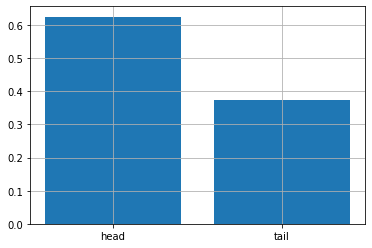

In [17]:
plt.bar([0, 1], prob_be_data, align='center')
plt.xticks([0, 1], ['head', 'tail'])
plt.grid(True)

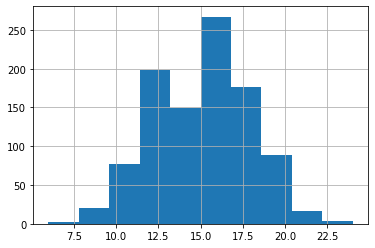

In [18]:
#二項分布
np.random.seed(0)
x = np.random.binomial(30, 0.5, 1000)
plt.hist(x)
plt.grid(True)

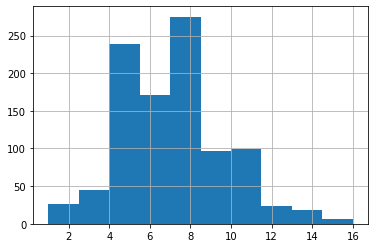

In [20]:
# Poison分布
x = np.random.poisson(7, 1000)
plt.hist(x)
plt.grid(True)

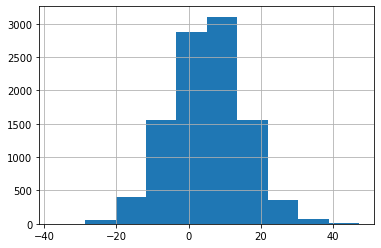

In [21]:
# 常態分佈
x = np.random.normal(5, 10, 10000)
plt.hist(x)
plt.grid(True)

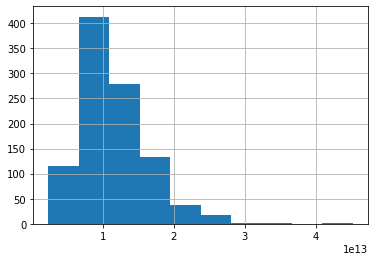

In [22]:
# 對數常態分佈
x = np.random.lognormal(30, 0.4, 1000)
plt.hist(x)
plt.grid(True)

### 核密度函數

In [23]:
import requests,zipfile
from io import StringIO
import io# 下載zipfile並解壓縮
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'
r = requests.get(url, stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()
student = pd.read_csv('student-mat.csv',sep =';')

<AxesSubplot:ylabel='Density'>

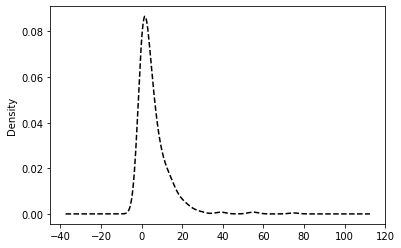

In [24]:
student.absences.plot(kind = 'kde',style = 'k--')

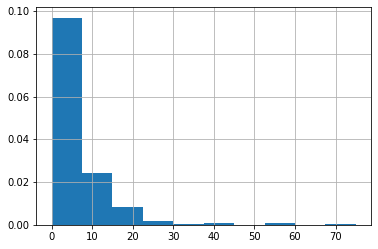

In [26]:
#單純直方圖，設定density=True，以機率顯示
student.absences.hist(density=True)
plt.grid(True)

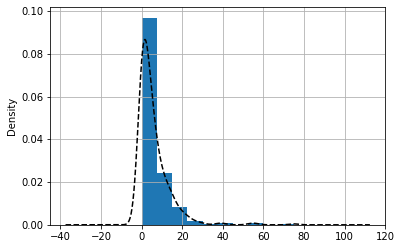

In [28]:
student.absences.plot(kind = 'kde',style = 'k--')
student.absences.hist(density=True)
plt.grid(True)

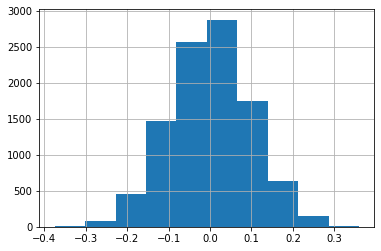

In [30]:
# 4-4
N = 10000
normal_data = [np.random.normal(0,1,100).mean() for _ in range(N)]
# x = np.random.normal(0, 1, 100)
plt.hist(normal_data)
plt.grid(True)

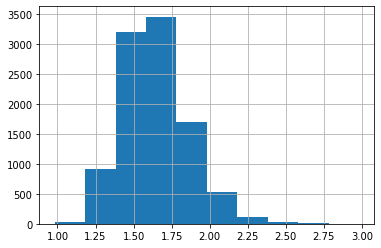

In [31]:
#4-5
lognormal_data = [np.random.lognormal(0,1,100).mean() for _ in range(N)]
plt.hist(lognormal_data )
plt.grid(True)

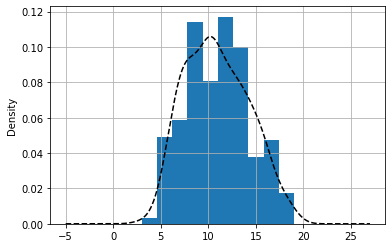

In [32]:
#4-6
student.G1.plot(kind = 'kde',style = 'k--')
student.G1.hist(density=True)
plt.grid(True)

### 多元機率分布

In [33]:
import scipy.stats as st
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

In [34]:
x, y = np.mgrid[10:100:2, 10:100:2]

pos = np.empty(x.shape + (2, ))

pos[:, :, 0] = x 
pos[:, :, 1] = y 

In [35]:
rv = multivariate_normal([50, 50], [[100, 0], [0, 100]])
z = rv.pdf(pos)

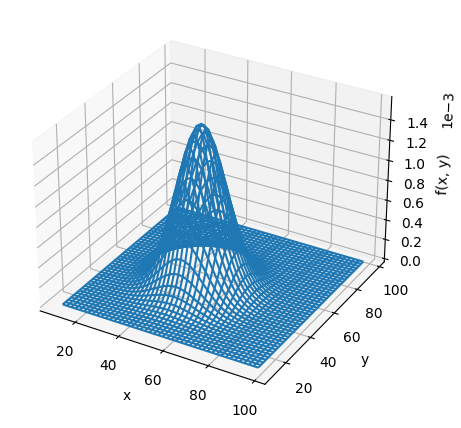

In [36]:
fig = plt.figure(dpi=100)

ax = Axes3D(fig)
ax.plot_wireframe(x, y, z)

# x,y,z 標籤
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')

# z軸表示刻度、sci為指數、axis為指定軸、scilimits=(n,m)從n到m之外的部分以指數表示
# scilimits=(0,0)全部以指數表示
ax.ticklabel_format(style='sci', axis='z', scilimits=(0, 0))

### 推論統計

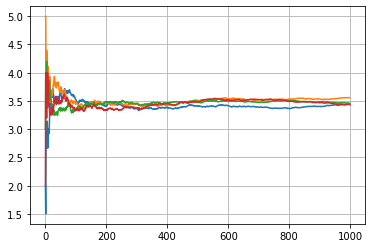

In [38]:
# 大數法則
calc_times =1000
# 骰子
sample_array = np.array([1, 2, 3, 4, 5, 6])
number_cnt = np.arange(1, calc_times + 1)

# 四個回合
for i in range(4):
    p = np.random.choice(sample_array, calc_times).cumsum()
    plt.plot(p / number_cnt)
    plt.grid(True)

In [39]:
# 中央極限定理
def function_central_theory(N):
    
    sample_array = np.array([1, 2, 3, 4, 5, 6])
    numaber_cnt = np.arange(1, N + 1) * 1.0
 
    mean_array = np.array([])
 
    for i in range(1000):   
        cum_variables = np.random.choice(sample_array, N).cumsum()*1.0
        mean_array = np.append(mean_array, cum_variables[N-1] / N)
 
    plt.hist(mean_array)
    plt.grid(True)

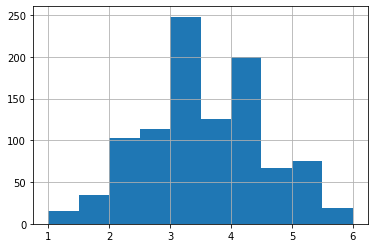

In [40]:
function_central_theory(3)

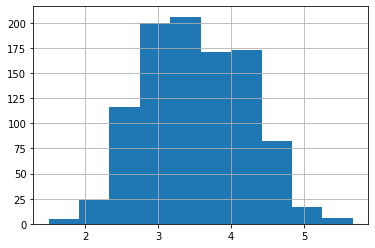

In [41]:
function_central_theory(6)

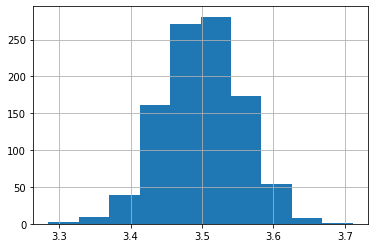

In [42]:
function_central_theory(10**3)

### 樣本分佈

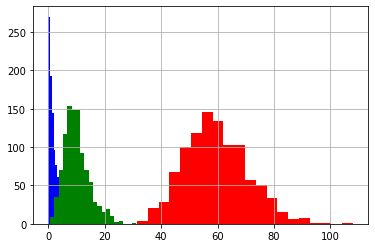

In [43]:
# 卡方分佈
for df, c in zip([2, 10, 60], 'bgr'):
    x = np.random.chisquare(df, 1000)
    plt.hist(x, 20, color=c)
    plt.grid(True)

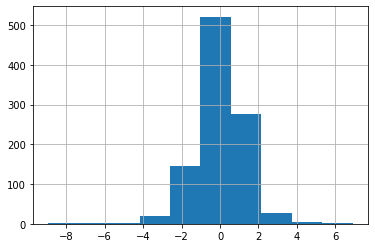

In [44]:
# t分佈
x = np.random.standard_t(5, 1000)
plt.hist(x)
plt.grid(True)

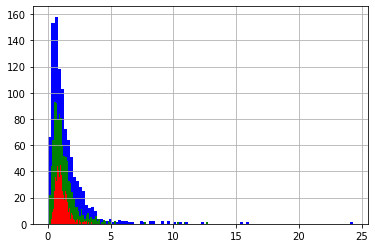

In [45]:
# F分佈
for df, c in zip([ (6, 7), (10, 10), (20, 25)], 'bgr'):
    x = np.random.f(df[0], df[1], 1000)
    plt.hist(x, 100, color=c)
    plt.grid(True)

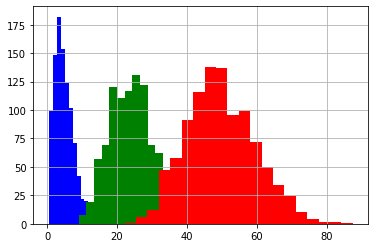

In [46]:
#4-7 卡方
for df, c in zip([5, 25, 50], 'bgr'):
    x = np.random.chisquare(df, 1000)
    plt.hist(x, 20, color=c)
    plt.grid(True)

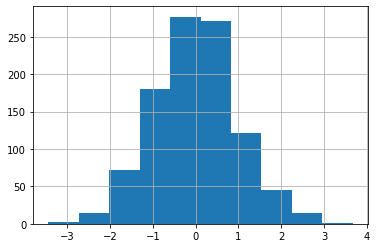

In [47]:
# 4-8 t分佈
x = np.random.standard_t(100, 1000)
plt.hist(x)
plt.grid(True)

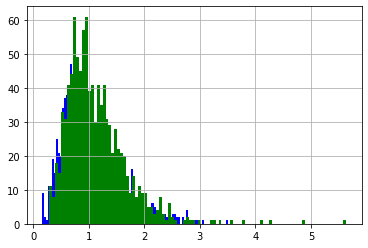

In [48]:
# 4-9 F分佈
for df, c in zip([ (10, 30), (20, 25)], 'bg'):
    x = np.random.f(df[0], df[1], 1000)
    plt.hist(x, 100, color=c)
    plt.grid(True)